In [55]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

from helpers.split import label_strings, tag_label_feature_split

In [57]:
def svm_experiment(dataset):

    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    df = pd.read_pickle(dataset)
    _, one_hot_labels, X = tag_label_feature_split(df)
    labels = label_strings(one_hot_labels)

    le = LabelEncoder()
    y = le.fit_transform(pd.Series.ravel(labels))

    # divide into train and test data sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y
    )

    # standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    model = SVC()

    model.fit(X_train_std, y_train)

    predictions = model.predict(X_test_std)
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = model.score(X_test_std, y_test)

    class_names = le.inverse_transform(list(model.classes_))
    print(f"Train: {train_accuracy = :f}\n")
    print(
        classification_report(
            y_train, model.predict(X_train_std), digits=4, target_names=class_names
        )
    )
    print(f"Test: {test_accuracy = :f}\n")
    print(
        classification_report(y_test, predictions, digits=4, target_names=class_names)
    )

    # generate confusion matrix and
    # display nicely with seaborn
    cm = confusion_matrix(y_test, predictions, normalize="true")
    heatmap_labels = list(le.classes_)
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".3f",
        linewidths=0.5,
        square=True,
        cmap="Blues_r",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    name = os.path.basename(dataset).split(".")[0]
    plt.title(f"{name} test (row normalized)")

    return model

Train: train_accuracy = 0.577518

                 precision    recall  f1-score   support

    genre_blues     1.0000    0.0107    0.0212       374
genre_classical     0.7914    0.8737    0.8305      4221
  genre_country     1.0000    0.0795    0.1473       327
    genre_disco     0.0000    0.0000    0.0000       289
   genre_hiphop     0.4879    0.3927    0.4352      1701
     genre_jazz     0.5699    0.1741    0.2667      1241
    genre_metal     0.8723    0.1233    0.2161       665
      genre_pop     0.4474    0.7576    0.5626      4274
   genre_reggae     0.6415    0.0431    0.0809       788
     genre_rock     0.5856    0.5962    0.5909      3200

       accuracy                         0.5775     17080
      macro avg     0.6396    0.3051    0.3151     17080
   weighted avg     0.6119    0.5775    0.5349     17080

Test: test_accuracy = 0.551627

                 precision    recall  f1-score   support

    genre_blues     0.0000    0.0000    0.0000        94
genre_classical   

/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

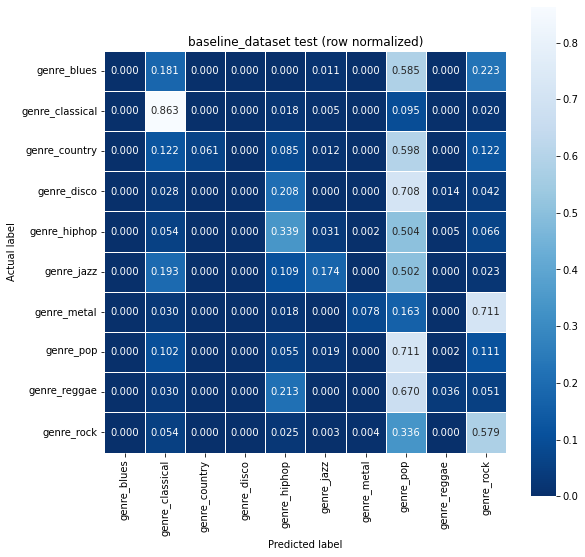

In [58]:
model_1 = svm_experiment("../../../datasets/baseline_dataset.pickle")

Train: train_accuracy = 0.732787

                 precision    recall  f1-score   support

    genre_blues     1.0000    0.0080    0.0159       374
genre_classical     0.8724    0.9251    0.8980      4221
  genre_country     0.9912    0.3456    0.5125       327
    genre_disco     0.8125    0.0450    0.0852       289
   genre_hiphop     0.7279    0.7249    0.7264      1701
     genre_jazz     0.8112    0.5504    0.6558      1241
    genre_metal     0.9301    0.3203    0.4765       665
      genre_pop     0.6139    0.8205    0.7023      4274
   genre_reggae     0.8611    0.5977    0.7056       788
     genre_rock     0.6892    0.7422    0.7147      3200

       accuracy                         0.7328     17080
      macro avg     0.8309    0.5080    0.5493     17080
   weighted avg     0.7603    0.7328    0.7143     17080

Test: test_accuracy = 0.637087

                 precision    recall  f1-score   support

    genre_blues     0.0000    0.0000    0.0000        94
genre_classical   

/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

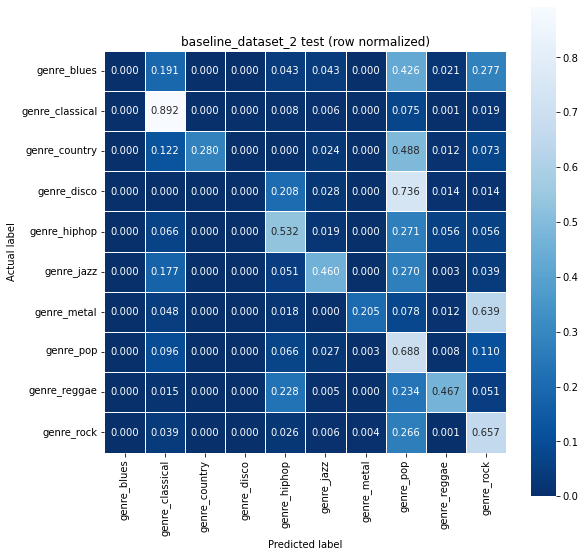

In [59]:
model_2 = svm_experiment("../../../datasets/baseline_dataset_2.pickle")

Train: train_accuracy = 0.633899

                 precision    recall  f1-score   support

    genre_blues     0.2949    0.2460    0.2682       374
genre_classical     0.8109    0.9022    0.8541      4221
  genre_country     0.4093    0.3242    0.3618       327
    genre_disco     0.4144    0.3183    0.3601       289
   genre_hiphop     0.5013    0.5755    0.5359      1701
     genre_jazz     0.5616    0.4738    0.5140      1241
    genre_metal     0.5974    0.4105    0.4866       665
      genre_pop     0.5760    0.6490    0.6103      4274
   genre_reggae     0.5222    0.3135    0.3918       788
     genre_rock     0.6566    0.5837    0.6180      3200

       accuracy                         0.6339     17080
      macro avg     0.5345    0.4797    0.5001     17080
   weighted avg     0.6269    0.6339    0.6262     17080

Test: test_accuracy = 0.492156

                 precision    recall  f1-score   support

    genre_blues     0.0568    0.0532    0.0549        94
genre_classical   

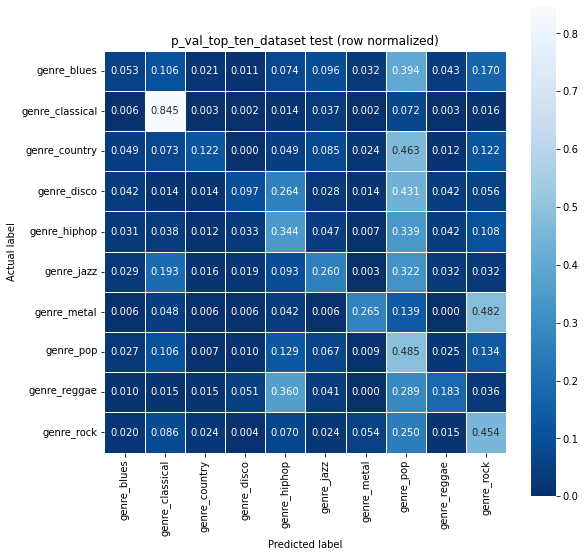

In [60]:
model_3 = knn_experiment("../../../datasets/p_val_top_ten_dataset.pickle")